In [16]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format

In [17]:
#Import relevant CSV files to the dataset

data_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
data_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
data_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [18]:
## Merged imdb.title.basics.csv.gz and imdb.title.ratings.csv.gz on the column 'tconst' with an inner join to eliminate 
## non-matching items.
data_title_overall = pd.merge(data_title_basics, data_title_ratings, on='tconst', how='inner')

In [19]:
## Renamed 'primary_title' to 'title' in order to smoothly merge this dataframe with bom.movie_gross.csv.gz.
data_title_overall = data_title_overall.rename(columns={'primary_title': 'title'})

In [20]:
## Merged IMDB and BOM data into one dataframe
movie_titles = pd.merge(data_movie_gross, data_title_overall, on='title', how='inner')
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   tconst           3027 non-null   object 
 6   original_title   3027 non-null   object 
 7   start_year       3027 non-null   int64  
 8   runtime_minutes  2980 non-null   float64
 9   genres           3020 non-null   object 
 10  averagerating    3027 non-null   float64
 11  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [21]:
#Created a list of columns for the movie_titles dataframe
movie_titles = movie_titles[['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'genres', 'numvotes']]

In [22]:
#Dropped all null values and set as default
movie_titles.dropna(axis=0, how='any', inplace=True)

In [23]:
#Converted the column type for 'Foreign Gross' from object to float
movie_titles['foreign_gross'] = movie_titles.foreign_gross.str.split(',').str.join('').astype(float)

In [24]:
#Created a column for total_gross revenue
movie_titles['total_gross'] = movie_titles['domestic_gross'] + movie_titles['foreign_gross']

In [25]:
#Adjusted the columns to eliminate domestic_gross and foreign_gross
movie_titles_genres = movie_titles[['title', 'studio', 'genres', 'total_gross', 'year', 'numvotes']]

In [26]:
#Created a Python function to iterate through all of the individual genres in the series, separating them when a comma appears.
#Then the function returns the count of the individual genres
def count_genre(x):
    data_plot = movie_titles_genres[x].str.cat(sep = ',')
    data = pd.Series(data_plot.split(','))
    info = data.value_counts(ascending=False)
    return info

In [27]:
#Create a new series from the function
total_genre_movies = count_genre('genres')

Text(0, 0.5, 'Genres')

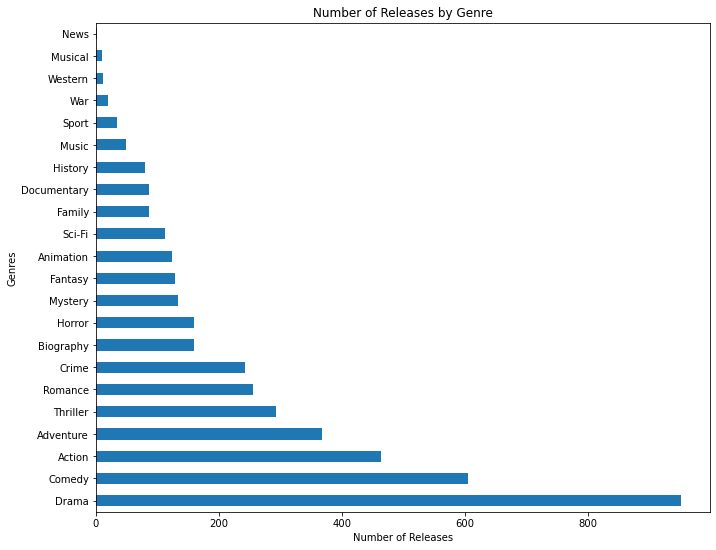

In [28]:
#Horizontal Bar Graph of the Number of Releases by Genre
total_genre_movies.plot(kind='barh', figsize=(11,9))
plt.title('Number of Releases by Genre')
plt.xlabel('Number of Releases')
plt.ylabel('Genres')

In [29]:
##Creates an alphabetized list of genres that are separated

unique_genres = movie_titles_genres.genres.unique()
movie_genres_list = []

for x in unique_genres:
    movie_genres_list.extend(x.split(','))

movie_genres = (list(set(movie_genres_list)))
movie_genres = sorted(movie_genres)

In [30]:
## Changed variable name of list for clarity
genre_list = movie_genres
genre_list

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [31]:
## Mapped a list that could be iterated through and created two arrays to set up a new dataframe
genre_details_pop = list(map(str, (movie_titles_genres['genres'])))

year = np.array(movie_titles_genres['year'])
popularity = np.array(movie_titles_genres['numvotes'])

In [32]:
## Created a new dataframe full of NaN values, then wrote a for loop to interate through the dataframe and replace the null values with the sum of 'total_gross

popularity_df = pd.DataFrame(index = genre_list, columns=range(2010, 2019))
popularity_df = popularity_df.fillna(value = 0.0)
z = 0
for i in genre_details_pop:
    split_genre = list(map(str, i.split(',')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [33]:
popularity_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Action,8831356.0000,9585422.0000,9680847.0000,9676470.0000,10422221.0000,7779078.0000,8532350.0000,6729552.0000,5103660.0000
Adventure,8386939.0000,7218940.0000,7879477.0000,9449823.0000,9088696.0000,7813257.0000,7846786.0000,5892383.0000,4537786.0000
Animation,2604601.0000,1379983.0000,1654662.0000,1707329.0000,1110429.0000,1133328.0000,1833585.0000,885992.0000,430839.0000
Biography,1956881.0000,898418.0000,1022759.0000,3378978.0000,1946134.0000,2194176.0000,1550085.0000,1325443.0000,1206092.0000
Comedy,6902484.0000,7131145.0000,7464407.0000,5833280.0000,5017910.0000,5731540.0000,5278829.0000,3638216.0000,2286263.0000


In [34]:
def calculate_std(x):
    return (x - x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Action,2.1106,2.1790,2.2176,2.0308,2.3618,2.0581,2.5260,2.5586,2.7642
Adventure,1.9573,1.4135,1.6359,1.9625,1.9556,2.0708,2.2570,2.1347,2.3666
Animation,-0.0366,-0.4755,-0.3742,-0.3703,-0.4746,-0.4101,-0.1029,-0.4003,-0.5193
Biography,-0.2599,-0.6313,-0.5783,0.1334,-0.2200,-0.0161,-0.2141,-0.1777,0.0255
Comedy,1.4455,1.3851,1.5018,0.8728,0.7156,1.2976,1.2492,0.9933,0.7845


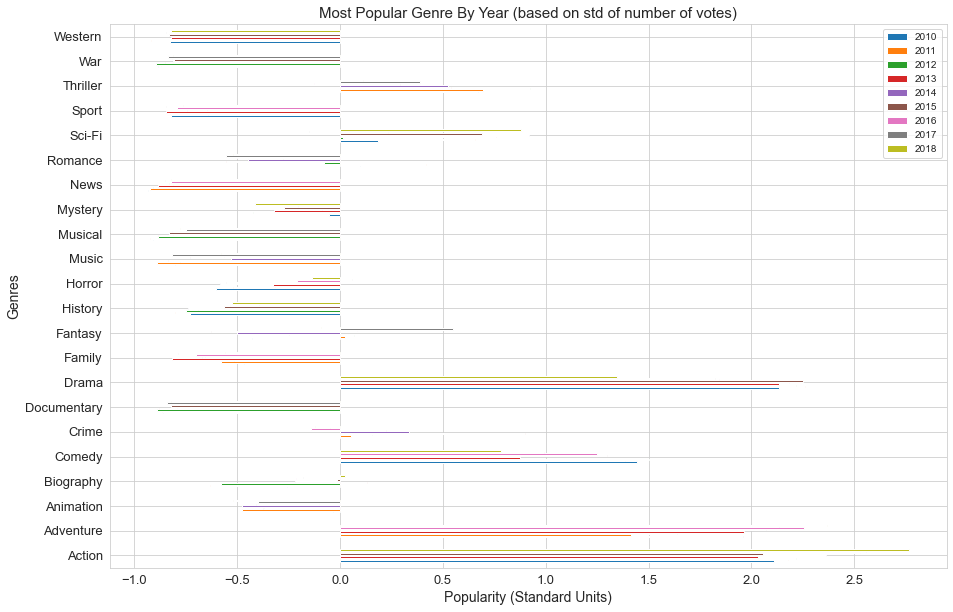

In [41]:
popular_genre.plot(kind='barh',figsize = (15,10),fontsize=13)
plt.title("Most Popular Genre By Year (based on std of number of votes)",fontsize=15)
plt.xlabel("Popularity (Standard Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

<AxesSubplot:>

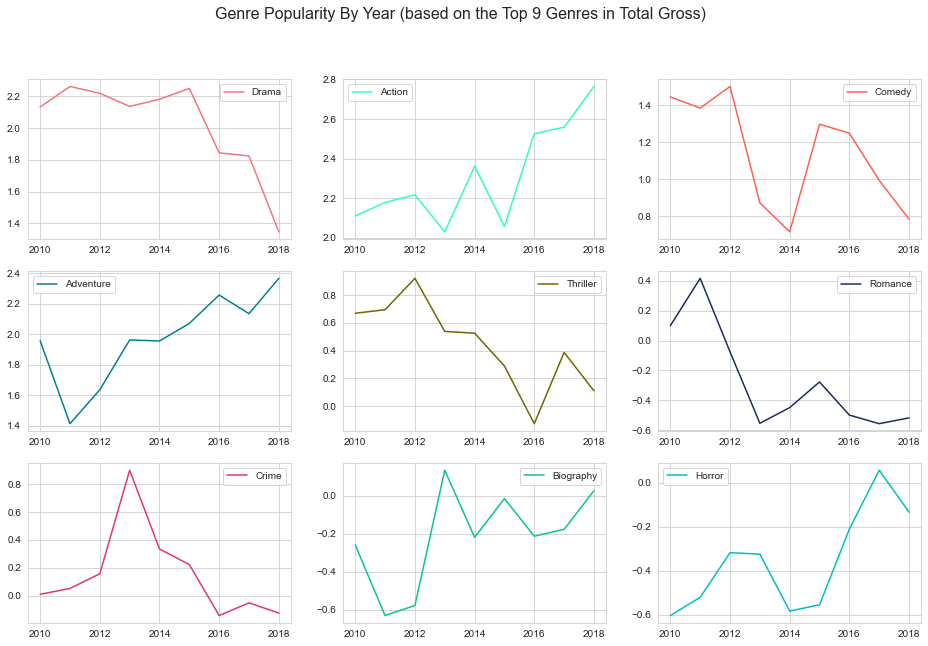

In [36]:
#Create Subplot to show Popularity of the Top 9 Grossing Genres
sns.set_style("whitegrid")
fig, ax = plt.subplots(3,3,figsize = (16,10))

fig.suptitle('Genre Popularity By Year (based on the Top 9 Genres in Total Gross)',fontsize = 16)

#Show all 9 Subplots
popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
popular_genre.loc['Action'].plot(label = "Action",color='#33FFB5',ax = ax[0][1],legend=True)
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Thriller'].plot(label = "Thriller",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Biography'].plot(label = "Biography",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Horror'].plot(label = "Horror",color='c',ax = ax[2][2],legend=True)

In [37]:
genre_details_gross = list(map(str, (movie_titles_genres['genres'])))

year = np.array(movie_titles_genres['year'])
gross = np.array(movie_titles_genres['total_gross'])

In [38]:
gross_df = pd.DataFrame(index = genre_list, columns=range(2010, 2019))
gross_df = gross_df.fillna(value = 0.0)
z = 0
for i in genre_details_gross:
    split_genre = list(map(str, i.split(',')))
    gross_df.loc[split_genre, year[z]] = gross_df.loc[split_genre, year[z]] + gross[z]
    z+=1

<AxesSubplot:>

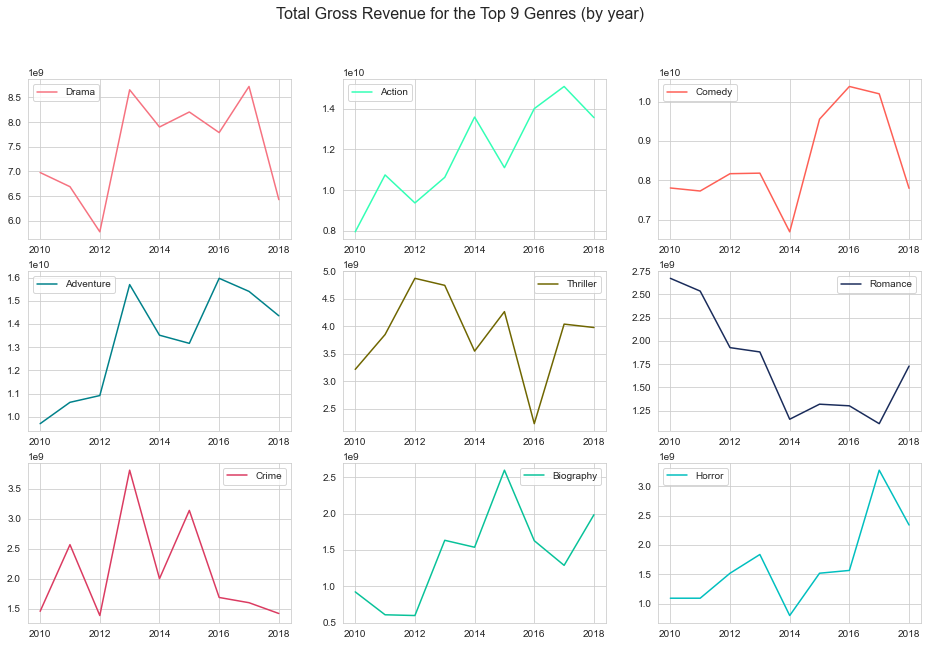

In [39]:
#Create Subplot to show Total Gross Revenue by year
sns.set_style("whitegrid")
fig, ax = plt.subplots(3,3,figsize = (16,10))

fig.suptitle('Total Gross Revenue for the Top 9 Genres (by year)',fontsize = 16)

#Show all 9 Subplots
gross_df.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
gross_df.loc['Action'].plot(label = "Action",color='#33FFB5',ax = ax[0][1],legend=True)
gross_df.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
gross_df.loc['Adventure'].plot(label = "Adventure",color='#00818a',ax = ax[1][0],legend=True)
gross_df.loc['Thriller'].plot(label = "Thriller",color='#6f6600',ax = ax[1][1],legend=True)
gross_df.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
gross_df.loc['Crime'].plot(label = "Crime",color='#db3b61',ax = ax[2][0],legend=True)
gross_df.loc['Biography'].plot(label = "Biography",color='#08c299',ax = ax[2][1],legend=True)
gross_df.loc['Horror'].plot(label = "Horror",color='c',ax = ax[2][2],legend=True)